# Regresja liniowa

W modelu liniowym zależność między $Y$ a $X_1, ..., X_p$ modelujemy jako:

$$Y=\beta_0 + \beta_1 X_1 + ... + \beta_p X_p + \epsilon$$

Wartości współczynników $\beta_0, ..., \beta_p$ szacowane są metodą "najmniejszych kwadratów", w której zminimalizowa jest wartość $RSS$ (*Residual Sum of Squares*):

$$RSS=\sum_{i = 1}^n (y_i - \hat{y_i})^2$$



## Model liniowy w `statsmodels`

Wykorzystamy zbiór [mtcars](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars).
W pierwszym przykładzie tworzymy model w postaci: 

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} $$

In [2]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("mtcars.csv")

y = df.mpg
X = sm.add_constant(df.hp)

print(X.head())
print()
print(y.head())

   const   hp
0    1.0  110
1    1.0  110
2    1.0   93
3    1.0  110
4    1.0  175

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


In [3]:
lm = sm.OLS(y, X)
lm_fit = lm.fit()

Procedura `fit` zwraca obiekt typu [`RegressionResults`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

W podsumowaniu (`summary()`) podane są m.in. wartość $R^2$ oraz $p$-wartości szacowanych współczynników.

In [4]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.79e-07
Time:                        11:00:36   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Współczynniki $\hat{\beta_0}$ i $\hat{\beta_1}$ zapisane są w `lm_fit.params`.

In [5]:
lm_fit.params

const    30.098861
hp       -0.068228
dtype: float64

Reszty (*residuals*) zapisane są w `lm_fit.resid`.

In [6]:
lm_fit.resid.head()

0   -1.593750
1   -1.593750
2   -0.953631
3   -1.193750
4    0.541088
dtype: float64

W ocenie modelu przydatna jest także wizualizacja.

Text(0, 0.5, 'Residual')

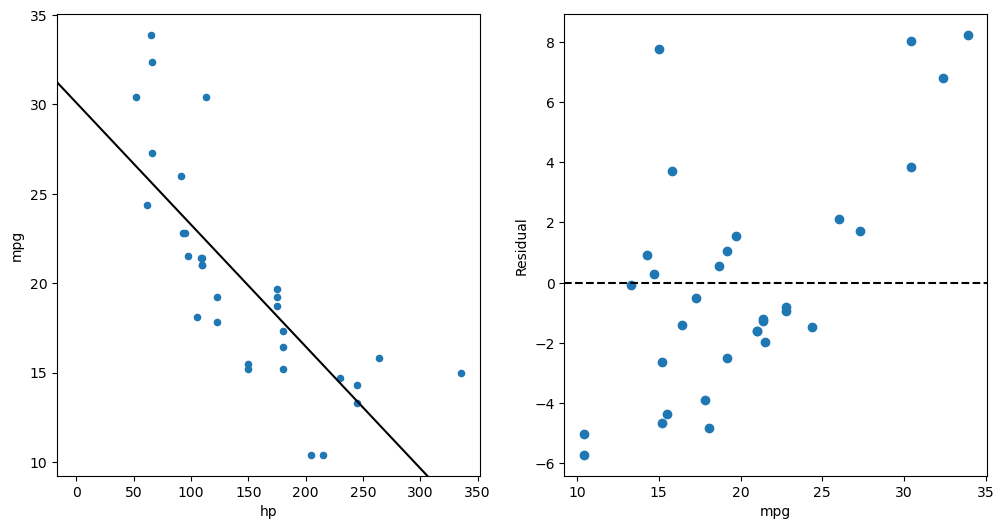

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind='scatter', y='mpg', x='hp', ax=ax1)
(b0, b1) = lm_fit.params

ax1.axline(xy1=(0,b0), slope=b1, color='k')

ax2.scatter(df.mpg, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('mpg')
ax2.set_ylabel('Residual')

Metoda `predict()` pozwala na predykcję wartości `mpg` dla nowych danych.

In [8]:
X_new = sm.add_constant([100, 150])
y_pred = lm_fit.predict(X_new)
y_pred

array([23.27603273, 19.86461883])

Tworząc model zawierający wiele zmiennych możemy skorzystać z `statsmodels.formula.api`, które pozwala podać 'wzór' modelu zamiast manualnie przygotowywać dane wejściowe. 
$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{cyl}$$

In [9]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula="mpg ~ hp + cyl", data=df)
lm_fit1 = lm1.fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.42
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           3.16e-09
Time:                        11:00:38   Log-Likelihood:                -80.781
No. Observations:                  32   AIC:                             167.6
Df Residuals:                      29   BIC:                             172.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9083      2.191     16.847      0.000      32.428      41.389
hp            -0.0191      0.015     -1.275      0.213      -0.050       0.012
cyl           -2.2647      0.576     -3.933      0.000      -3.443      -1.087
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.092
Skew:                           0.411   Prob(JB):                        0.579
Kurtosis:                       2.623   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Względem poprzedniego modelu wartość $R^2$ wzrosła z $0.602$ do $0.741$. Zwróćmy uwagę, że $p$-wartość współczynnika `hp` wynosi 0.213, co sugeruje, że nie ma zależności między `mpg` a `hp`, mimo że wykryliśmy taką zależność w modelu jednoczynnikowym. Jest to spowodowane liniową współzależnością między zmiennymi.

<Axes: >

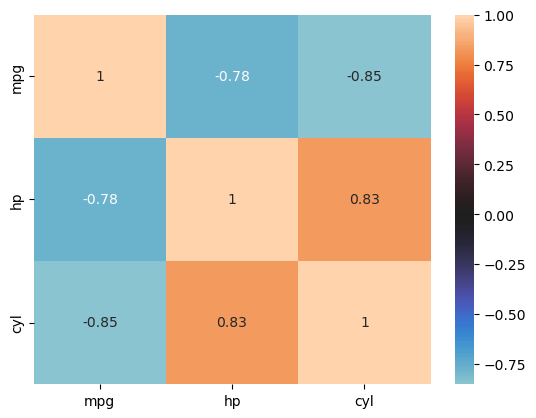

In [10]:
import seaborn as sns
sns.heatmap(df[["mpg", "hp", "cyl"]].corr(), annot=True, center=0.0)

Rozważmy alternatywny model:

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{wt}$$

In [11]:
lm2 = smf.ols(formula="mpg ~ hp + wt", data=df)
lm_fit2 = lm2.fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           9.11e-12
Time:                        11:00:38   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model wielomianowy

W rozważanym wcześniej modelu `mpg ~ hp` faktyczny rozkład danych widoczny na wykresie jest wyraźnie nieliniowy. Sprawdźmy, czy poniższy model wielomianowy lepiej odwzoruje zależność między `mpg` a `hp`. 

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{hp}^2$$

In [12]:
lm3 = smf.ols(formula="mpg ~ hp + I(hp**2)", data=df)

lm_fit3 = lm3.fit()

lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     44.95
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.30e-09
Time:                        11:00:38   Log-Likelihood:                -79.801
No. Observations:                  32   AIC:                             165.6
Df Residuals:                      29   BIC:                             170.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4091      2.741     14.744      0.000      34.804      46.015
hp            -0.2133      0.035     -6.115      0.000      -0.285      -0.142
I(hp ** 2)     0.0004   9.84e-05      4.275      0.000       0.000       0.001
==============================================================================
Omnibus:                        6.211   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.579
Skew:                           0.844   Prob(JB):                        0.101
Kurtosis:                       3.767   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residual')

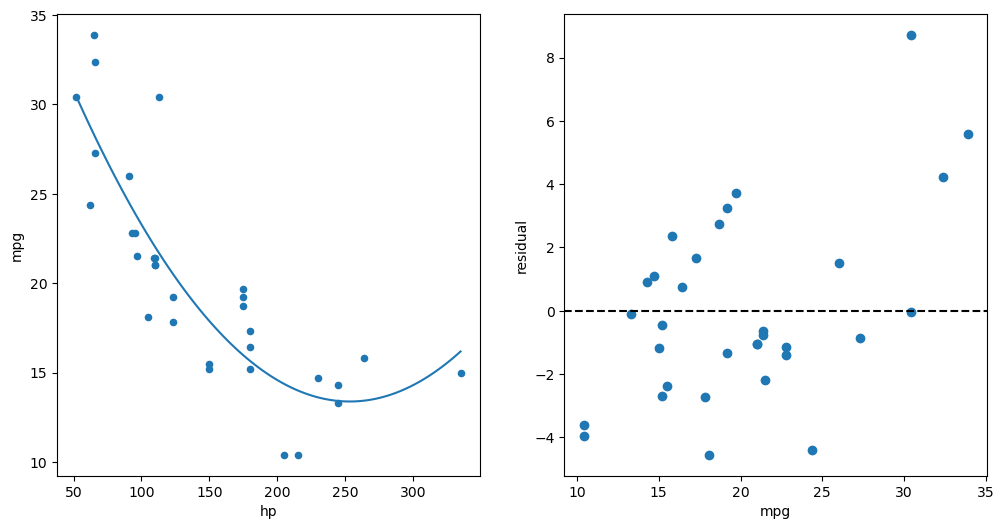

In [13]:
import numpy as np
import patsy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.plot(kind='scatter', y='mpg', x='hp', ax=ax1)

x_plot = np.linspace(df.hp.min(), df.hp.max(), 100)
X_plot = patsy.dmatrix(" ~ 1 + hp + I(hp**2)", data={"hp": x_plot}, return_type='dataframe')
y_plot = lm_fit3.predict(X_plot)

ax1.plot(x_plot, y_plot)

ax2.scatter(df.mpg, lm_fit3.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('mpg')
ax2.set_ylabel('residual')

## Modelowanie interakcji między zmiennymi

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{wt} + \hat{\beta_3} \mathtt{hp} \cdot \mathtt{wt}$$

In [14]:
lm4 = smf.ols(formula="mpg ~ hp + wt + hp:wt", data=df) # Możemy też wykorzystać formula="mpg ~ hp*wt"

lm_fit4 = lm4.fit()

lm_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           2.98e-13
Time:                        11:00:38   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8084      3.605     13.816      0.000      42.424      57.193
hp            -0.1201      0.025     -4.863      0.000      -0.171      -0.070
wt            -8.2166      1.270     -6.471      0.000     -10.818      -5.616
hp:wt          0.0278      0.007      3.753      0.001       0.013       0.043
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.736
Skew:                           0.407   Prob(JB):                        0.420
Kurtosis:                       2.200   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Zadania
1. Wczytaj zbiór danych w pliku `boston.csv` ([opis](https://www.rdocumentation.org/packages/MASS/versions/7.3-58.3/topics/Boston)), a następnie modeluj zależność `medv` od pozostałych zmiennych.
    - Testuj kilka modeli (z jedną lub wieloma zmiennymi) i wybierz najlepszy. Dokonując manualnej selekcji modelu warto wstępnie zwizualizować macierz korelacji między zmiennymi. Można też skorzystać z metod forward/backward selection.
    - Porównując modele, wykorzystaj `summary()`, aby sprawdzić $R^2$ modelu i $p$-wartośći współczynników.
    - Wizualizuj modele (np. *residual plot*).
    - Bonus: modeluj także zależności nieliniowe (np. wielomianowe) i/lub interakcje między zmiennymi.
2. Wczytaj zbiór danych w pliku `housing.csv`, 
    - Usuń wiersze zawierające brakujące dane (lub zastąp wartością średnią).
    - Koduj zmienną `ocean_proximity` (np. metodą `get_dummies()`).
    - Modeluj zależność `median_house_value` od `ocean_proximity`.

In [15]:
boston = pd.read_csv("boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Sprawwdźmy korelację, żeby wybrać wstępnie zmienne do modelu:

<Axes: >

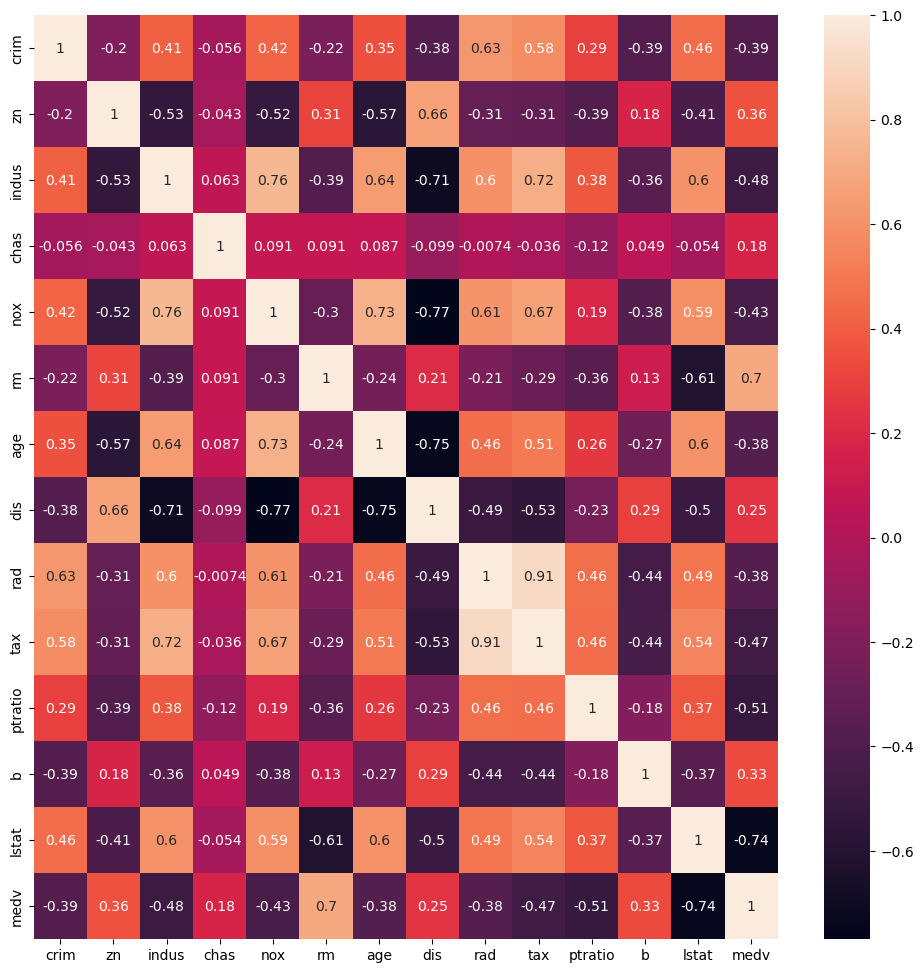

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(boston.corr(), annot=True, ax=ax)

In [17]:
y = boston.medv
X = sm.add_constant(boston.lstat)
model = sm.OLS(y, X)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           5.08e-88
Time:                        11:00:39   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dodajmy trzy zmienne z największą korelacją z zmienną objaśnianą

In [18]:
X = boston[["lstat","rm","ptratio"]]
X = sm.add_constant( X)
model = sm.OLS(y, X)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          2.69e-123
Time:                        11:00:39   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.000      10.879      26.255
lstat         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
rm             4.5154      0.426     10.603      0.000       3.679       5.352
ptratio       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Spróbujmy dodać 4/5 pod tym względem zmienną

In [19]:
X = boston[["lstat","rm","ptratio","tax", "indus"]]
X = sm.add_constant( X)
model = sm.OLS(y, X)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     212.9
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          2.37e-121
Time:                        11:00:39   Log-Likelihood:                -1551.6
No. Observations:                 506   AIC:                             3115.
Df Residuals:                     500   BIC:                             3141.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5177      3.975      4.407      0.000       9.708      25.327
lstat         -0.5590      0.049    -11.444      0.000      -0.655      -0.463
rm             4.6252      0.431     10.740      0.000       3.779       5.471
ptratio       -0.8762      0.125     -6.988      0.000      -1.122      -0.630
tax           -0.0035      0.002     -1.662      0.097      -0.008       0.001
indus          0.0570      0.053      1.081      0.280      -0.047       0.161
==============================================================================
Omnibus:                      218.718   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1228.229
Skew:                           1.824   Prob(JB):                    1.97e-267
Kurtosis:                       9.704   Cond. No.                     7.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Widzimy, że wartość R minimalnie rośnie, natomiast obie nowe wartości mają p--wartość większą od $0.05$, czyli nie są istotne statystycznie.
Wzrost R jest również tak minimalny, że nie warto obciążać modelu dodatkowymi zmiennymi.

Text(0, 0.5, 'Residual')

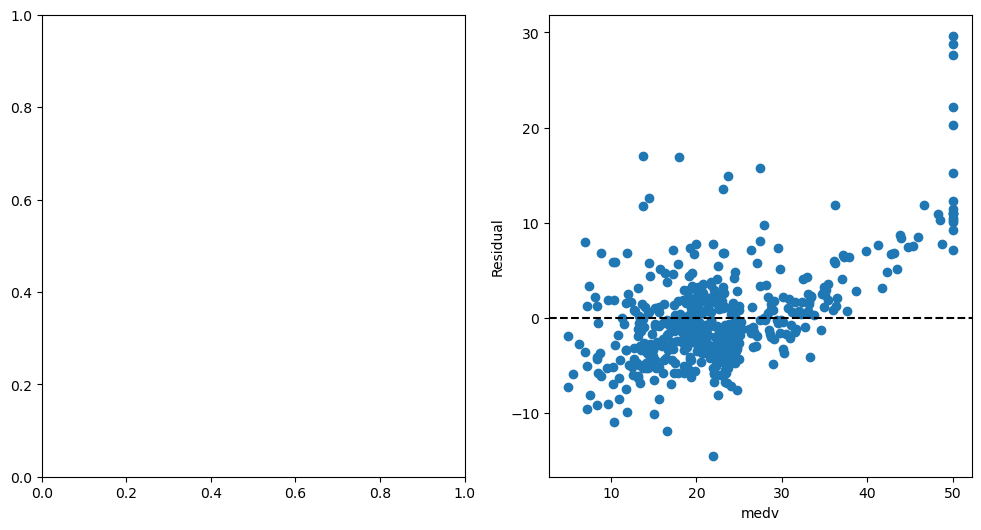

In [20]:
#Użyjmy najlepszego modelu
X = boston[["lstat","rm","ptratio"]]
X = sm.add_constant(X)
model = sm.OLS(y, X)
fit_model = model.fit()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#boston.plot(kind='scatter', y='medv', x='model', ax=ax1)
#(b0, b1,b2,b3) = fit_model.params
#print(fit_model.params)
#ax1.axline(xy1=(0,b0), slope=b1, color='k')

ax2.scatter(boston.medv, fit_model.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('Residual')

In [21]:
wiel_model = smf.ols(formula="medv ~ lstat+ I(lstat*ptratio) + ptratio + rm + I(rm*lstat) + I(rm**2)", data=boston)

fitted_wiel_model = wiel_model.fit()

fitted_wiel_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     281.8
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.02e-156
Time:                        11:00:40   Log-Likelihood:                -1466.0
No. Observations:                 506   AIC:                             2946.
Df Residuals:                     499   BIC:                             2976.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             63.9756     14.770      4.331      0.000      34.956      92.996
lstat                  1.0465      0.422      2.480      0.013       0.218       1.875
I(lstat * ptratio)    -0.0058      0.015     -0.395      0.693      -0.034       0.023
ptratio               -0.5434      0.208     -2.610      0.009      -0.953      -0.134
rm                   -14.1412      3.955     -3.575      0.000     -21.913      -6.370
I(rm * lstat)         -0.2677      0.045     -5.914      0.000      -0.357      -0.179
I(rm ** 2)             1.6520      0.281      5.887      0.000       1.101       2.203
==============================================================================
Omnibus:                      235.552   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3715.484
Skew:                           1.609   Prob(JB):                         0.00
Kurtosis:                      15.879   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Zadanie 2

In [22]:
house = pd.read_csv("housing.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
missing_rows = house[house.isnull().any(axis=1)]
print(missing_rows)
#usunięcie ich
house2=house.dropna()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  media

In [24]:
print(house.shape[0])
print(house2.shape[0])
missing_rows2 = house2[house2.isnull().any(axis=1)]
print(missing_rows2)

20640
20433
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [33]:

house2_encoded = pd.get_dummies(house2['ocean_proximity'], prefix='Ocean_proximity')

# Dołączenie zakodowanych kolumn do oryginalnego DataFrame
house3 = pd.concat([house2, house2_encoded], axis=1)
house3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Ocean_proximity_<1H OCEAN,Ocean_proximity_INLAND,Ocean_proximity_ISLAND,Ocean_proximity_NEAR BAY,Ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,False,True,False


In [43]:
ocean_proximity_columns = ['Ocean_proximity_<1H OCEAN', 'Ocean_proximity_INLAND',
                            'Ocean_proximity_ISLAND', 'Ocean_proximity_NEAR BAY',
                            'Ocean_proximity_NEAR OCEAN']

house3[ocean_proximity_columns] = house3[ocean_proximity_columns].astype(int)
# Dodajemy stałą kolumnę (intercept) do modelu
house3 = sm.add_constant(house3)
print(type(house3['Ocean_proximity_<1H OCEAN']))
# Podział na zmienne niezależne (X) i zmienną zależną (y)
X = house3[['const', 'Ocean_proximity_<1H OCEAN', 'Ocean_proximity_INLAND',
            'Ocean_proximity_ISLAND', 'Ocean_proximity_NEAR BAY',
            'Ocean_proximity_NEAR OCEAN']]
y = house3['median_house_value']

# Dopasowanie modelu OLS
model = sm.OLS(y, X).fit()

model.summary()

<class 'pandas.core.series.Series'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     1591.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:26:36   Log-Likelihood:            -2.6440e+05
No. Observations:               20433   AIC:                         5.288e+05
Df Residuals:                   20428   BIC:                         5.288e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.226e+17   1.99e+17     -1.121      0.262   -6.12e+17    1.67e+17
Ocean_proximity_<1H OCEAN   2.226e+17   1.99e+17      1.121      0.262   -1.67e+17    6.12e+17
Ocean_proximity_INLAND      2.226e+17   1.99e+17      1.121      0.262   -1.67e+17    6.12e+17
Ocean_proximity_ISLAND      2.226e+17   1.99e+17      1.121      0.262   -1.67e+17    6.12e+17
Ocean_proximity_NEAR BAY    2.226e+17   1.99e+17      1.121      0.262   -1.67e+17    6.12e+17
Ocean_proximity_NEAR OCEAN  2.226e+17   1.99e+17      1.121      0.262   -1.67e+17    6.12e+17
==============================================================================
Omnibus:                     2738.776   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4000.041
Skew:                           1.013   Prob(JB):                         0.00
Kurtosis:                       3.769   Cond. No.                     7.98e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""